# **Data Visualization**

## Objectives

* Answer business requirement 1: The client is interested in being able to visually differentiate a cherry leaf that is healthy from one that contains powdery mildew.

## Inputs

* inputs/cherry_tree_dataset/cherry-leaves/test
* inputs/cherry_tree_dataset/cherry-leaves/train
* inputs/cherry_tree_dataset/cherry-leaves/validation

## Outputs

* Image shape embeddings pickle file
* Mean and variability of images per label plot
* Plot to distinguish difference between healthy and infected tree images
* Generate code that meets business requirement 1 and can be used to build image montage on streamlit dashboard.

## Additional Comments

* No comments 



---

## Import desired libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

In [2]:
%pip install -r /workspace/mildew-in-cherry-trees/requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Set the working directory

In [3]:
cwd= os.getcwd()

In [4]:
os.chdir('/workspace/mildew-in-cherry-trees')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-in-cherry-trees'

### Set input directory

Set the train, test and validation paths.

In [6]:
my_data_dir = 'inputs/cherry_tree_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


### Set label names

In [8]:
# Set the labels
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


---

# Data Visualization

### Image shape

This will show the average image size on the train set

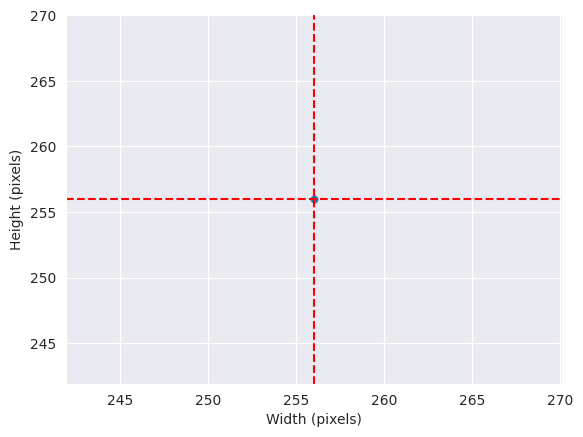

Width average: 256 
Height average: 256


In [9]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1) # image height
        dim2.append(d2) # image width

sns.set_style("darkgrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean,color='r', linestyle='--')
axes.axhline(y=dim2_mean,color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

The average image size for all the data

In [10]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(256, 256, 3)

Saving the image shape embeddings

In [11]:
joblib.dump(value=image_shape , filename=f"{file_path}/image_shape.pk1")

['outputs/v1/image_shape.pk1']

---

### Average and variability of iamges per label

Function to load images into an array

In [ ]:
# The import statement gives us the ability to process and handle image data

from tensorflow.keras.preprocessing import image

# Images to be loaded at new size of 50/50 pixels to reduce file size.

def load_image_as_array(my_data_dir, new_size=(50,50), n_images_per_label = 20):

    X, y = np.array([], dtype="int"), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

---

# Conclusion and next steps

### Conclusion

* The outcome of this notebook was to obtain the data from Kaggle, check for any non image files, remove them if necessary and split the data between train, test and validation.

* The data set contained 4208 images of leaves. Evenly split in the middle, healthy and not healthy.

* The data was then split into test, train and validation. 70% train, 10% validation and 20% test.

### The next steps

* The next notebook will contain the data visulaization part. Focussing on the first business requirement - The client is interested in being able to visually differentiate a cherry leaf that is healthy from one that contains powdery mildew.